In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [21]:
df_knn = pd.read_csv("df_cbc_tfidf.csv")

In [22]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBC
0,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.175439
1,1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.175439
2,3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.175439
3,3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.175439
4,4,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.175439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.614035
74996,42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.614035
74997,42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.614035
74998,42976,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.614035


Splitting dependent and independent variables

In [23]:
X = df_knn.drop(['X..CBC', 'index'], axis = 1)
y = df_knn[['X..CBC']]

Plotting histograms on target variable

In [24]:
y_array = y.to_numpy()
y_array

array([[0.1754386 ],
       [0.1754386 ],
       [0.1754386 ],
       ...,
       [0.61403509],
       [0.61403509],
       [0.61403509]])

<AxesSubplot:ylabel='Count'>

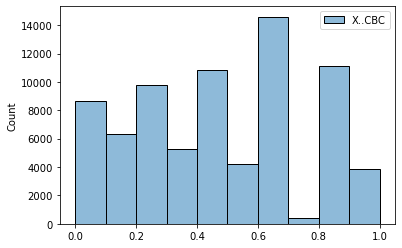

In [25]:
sns.histplot(y, bins = 10)

Train test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [28]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.09499400884495622

In [30]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7687264625122201

In [31]:
#val
r2_score(y_val, y_pred_knreg)

0.6280079871312219

Feature Selection

In [32]:
rfreg = RandomForestRegressor()

In [33]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [34]:
selector.estimator_.feature_importances_

array([1.15422584e-03, 2.02252349e-03, 3.49623591e-04, 2.09544356e-03,
       8.57986811e-04, 2.70763030e-03, 1.33875860e-03, 4.44689887e-03,
       8.81093189e-04, 1.12800167e-03, 8.39244805e-04, 7.36952548e-03,
       1.92720424e-03, 6.16511627e-04, 8.11645257e-04, 3.50055512e-04,
       1.79781429e-03, 1.46965725e-03, 4.97707704e-04, 1.12152465e-03,
       3.72442095e-03, 2.54126664e-03, 1.30888852e-03, 3.95982201e-04,
       1.46200742e-03, 4.17859472e-04, 1.47318791e-03, 1.13796096e-03,
       1.23292040e-03, 1.05154430e-03, 5.17359520e-03, 7.98977409e-04,
       1.39442729e-03, 5.35924336e-04, 1.97054685e-03, 4.44406656e-03,
       2.19945099e-03, 5.72328031e-03, 1.40407780e-03, 3.32279123e-03,
       6.76219199e-04, 1.14038868e-03, 6.44793909e-04, 4.40290171e-03,
       9.99897412e-04, 1.26492414e-03, 2.45097680e-03, 2.53156886e-04,
       2.39149846e-03, 6.75459117e-04, 3.42036100e-04, 5.94074878e-04,
       1.01412307e-03, 1.31043450e-03, 1.73391434e-03, 1.67634877e-03,
      

In [35]:
selector.threshold_

0.0021321961620469083

In [36]:
mask = selector.get_support()

In [37]:
mask

array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False,  True, False,
        True, False,

In [38]:
selected_features = X.columns[mask]

In [39]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_5,tfidf_7,tfidf_11,tfidf_20,tfidf_21,tfidf_30,tfidf_35,tfidf_36,tfidf_37,tfidf_39,...,grapefruit,lemon,mint,orange,pine,pungent,rose,skunk,sweet,vanilla
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.14162,0.189796,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,0.145484,0.0,0.000000,0.0,0.0,0.0,0.213037,0.0,0.00000,0.000000,...,0,0,0,0,1,0,0,0,0,0
3,0.145484,0.0,0.000000,0.0,0.0,0.0,0.213037,0.0,0.00000,0.000000,...,0,0,0,0,1,0,0,0,0,0
4,0.000000,0.0,0.165804,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74996,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74997,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74998,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,...,1,1,1,1,1,1,1,1,1,1


In [40]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_7',
 'tfidf_11',
 'tfidf_20',
 'tfidf_21',
 'tfidf_30',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_39',
 'tfidf_43',
 'tfidf_46',
 'tfidf_48',
 'tfidf_73',
 'tfidf_78',
 'tfidf_93',
 'tfidf_104',
 'tfidf_117',
 'tfidf_119',
 'tfidf_121',
 'tfidf_124',
 'tfidf_126',
 'tfidf_128',
 'tfidf_129',
 'tfidf_130',
 'tfidf_131',
 'tfidf_141',
 'tfidf_142',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_154',
 'tfidf_158',
 'tfidf_162',
 'tfidf_166',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_178',
 'tfidf_184',
 'tfidf_199',
 'tfidf_200',
 'tfidf_205',
 'tfidf_207',
 'tfidf_209',
 'tfidf_210',
 'tfidf_216',
 'tfidf_230',
 'tfidf_237',
 'tfidf_239',
 'tfidf_240',
 'tfidf_245',
 'tfidf_253',
 'tfidf_257',
 'tfidf_258',
 'tfidf_266',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_289',
 'tfidf_291',
 'tfidf_303',
 'tfidf_304',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_329',
 'tfidf_336',
 'tfidf_337',
 'tfidf_340',
 'tfidf_342',
 'tfidf_343',
 'tfidf_34

In [41]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_cbc.pkl")
joblib.dump(selector, "selector_knn_tfidf_cbc.pkl")

['selector_knn_tfidf_cbn.pkl']

Train test split (after Feature Selection)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [43]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [44]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [45]:
mean_absolute_error(y_val, y_pred_knreg)

0.09037922874883403

In [46]:
mean_squared_error(y_val, y_pred_knreg)

0.026767918213366944

In [47]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1636090407445962

In [48]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7874991118175656

In [49]:
#val
r2_score(y_val, y_pred_knreg)

0.6478189484103272

Hyperparameter Tuning

In [50]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [51]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [52]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [53]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.041179064549046546

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.015246203579361002

In [57]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.12347551813764947

In [58]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.981207959631317

In [59]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.7994082331494762

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [60]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [69]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_cbc.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_cbc.pkl")

['y_test_knreg_tfidf_cbc.pkl']

In [1]:
import joblib

y_pred_knreg_test = joblib.load("/Users/andalanputra/Desktop/masters/thesis/modeling knn tfidf each target/y_pred_knreg_test_tfidf_cbc.pkl")
y_test = joblib.load("/Users/andalanputra/Desktop/masters/thesis/modeling knn tfidf each target/y_test_knreg_tfidf_cbc.pkl")

In [4]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.04194482274158984

In [5]:
r2_score(y_test, y_pred_knreg_test)

0.7955627651708501

In [6]:
mean_squared_error(y_test, y_pred_knreg_test)

0.015558047014423001

In [7]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.12473190054842827

In [8]:
y_test

,X..CBC
11591,0.482456
52020,0.203509
34666,0.596491
22169,0.956140
23049,0.832749
...,...
60863,0.298246
32316,0.292398
60933,0.298246
43206,0.543860


In [9]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

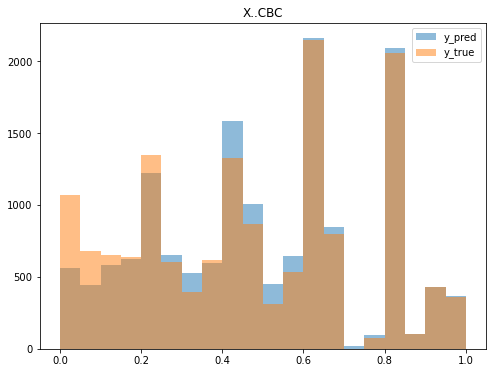

<Figure size 432x288 with 0 Axes>

In [10]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBC"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_cbc.png')

Pearson R

In [70]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.898
P-value: 0.000


<AxesSubplot:>

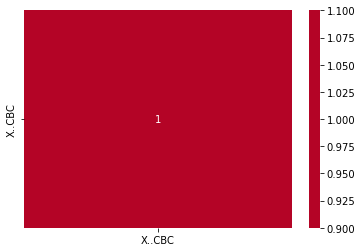

In [71]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)